In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# file_path = '/mnt/data/AP.xlsx'
data = pd.read_excel("/content/drive/My Drive/kalvium/AP.xlsx")

# Display the first few rows of the dataset
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Round,Status
0,Achanta,56,SATYANARAYANA PITHANI,Telugu Desam,CHERUKUVADA SRI RANGANADHA RAJU,Yuvajana Sramika Rythu Congress Party,26554,14/14,Result Declared
1,Addanki,105,GOTTIPATI RAVI KUMAR,Telugu Desam,CHINNA HANIMIREDDY PANEM,Yuvajana Sramika Rythu Congress Party,24890,22/22,Result Declared
2,Adoni,146,DR. PARTHA SARATHI VALMIKI,Bharatiya Janata Party,Y. SAI PRASAD REDDY,Yuvajana Sramika Rythu Congress Party,18164,19/19,Result Declared
3,Allagadda,134,AKHILA PRIYA BHUMA,Telugu Desam,BRIJENDRA REDDY GANGULA (NANI),Yuvajana Sramika Rythu Congress Party,12037,22/22,Result Declared
4,Alur,147,B. VIRUPAKSHI,Yuvajana Sramika Rythu Congress Party,B. VEERABHADRA GOWD,Telugu Desam,2831,21/21,Result Declared


In [9]:
# Insight 1: Total Seats Won by Each Party
total_seats_by_party = data['Leading Party'].value_counts()
print("Total Seats Won by Each Party:\n", total_seats_by_party)

Total Seats Won by Each Party:
 Leading Party
Telugu Desam                             135
Janasena Party                            21
Yuvajana Sramika Rythu Congress Party     11
Bharatiya Janata Party                     8
Name: count, dtype: int64


In [10]:
# Insight 2: Top 5 Constituencies with Highest Margin of Victory
top_5_margins = data.nlargest(5, 'Margin')[['Constituency', 'Margin', 'Leading Candidate', 'Leading Party']]
print("\nTop 5 Constituencies with Highest Margin of Victory:\n", top_5_margins)


Top 5 Constituencies with Highest Margin of Victory:
      Constituency  Margin        Leading Candidate   Leading Party
33       Gajuwaka   95235       PALLA SRINIVAS RAO    Telugu Desam
17        Bhimili   92401      GANTA SRINIVASA RAO    Telugu Desam
75    Mangalagiri   91413              NARA LOKESH    Telugu Desam
111     Pendurthi   81870  PANCHAKARLA RAMESH BABU  Janasena Party
90   Nellore City   72489         NARAYANA PONGURU    Telugu Desam


In [11]:
# Insight 3: Party with Most Narrow Victories
narrow_victories = data.nsmallest(5, 'Margin')[['Constituency', 'Margin', 'Leading Candidate', 'Leading Party']]
print("\nParty with Most Narrow Victories:\n", narrow_victories)



Party with Most Narrow Victories:
         Constituency  Margin             Leading Candidate  \
71   Madakasira (SC)     351                      M.S.RAJU   
37          Giddalur     973         ASHOK REDDY MUTHUMULA   
26             Darsi    2456  BUCHEPALLI SIVA PRASAD REDDY   
132        Rayachoti    2495    MANDIPALLI RAMPRASAD REDDY   
4               Alur    2831                 B. VIRUPAKSHI   

                             Leading Party  
71                            Telugu Desam  
37                            Telugu Desam  
26   Yuvajana Sramika Rythu Congress Party  
132                           Telugu Desam  
4    Yuvajana Sramika Rythu Congress Party  


In [12]:
# Insight 4: Average Margin of Victory by Party
avg_margin_by_party = data.groupby('Leading Party')['Margin'].mean().sort_values(ascending=False)
print("\nAverage Margin of Victory by Party:\n", avg_margin_by_party)



Average Margin of Victory by Party:
 Leading Party
Janasena Party                           47430.523810
Telugu Desam                             32038.762963
Bharatiya Janata Party                   28608.375000
Yuvajana Sramika Rythu Congress Party    16179.545455
Name: Margin, dtype: float64


In [13]:
# Insight 5: Constituency with Maximum Candidates (using 'Round' as a proxy for candidates)
max_candidates = data.loc[data['Round'].str.split('/').str[0].astype(int).idxmax()]
print("\nConstituency with Maximum Candidates:\n", max_candidates)



Constituency with Maximum Candidates:
 Constituency                               Nandikotkur (SC)
Const. No.                                              136
Leading Candidate                               G JAYASURYA
Leading Party                                  Telugu Desam
Trailing Candidate                             DARA SUDHEER
Trailing Party        Yuvajana Sramika Rythu Congress Party
Margin                                                 9792
Round                                                 27/27
Status                                      Result Declared
Name: 83, dtype: object


In [14]:
# Insight 6: Percentage of Seats Won by Each Party
total_seats = data.shape[0]
percentage_seats = (total_seats_by_party / total_seats) * 100
print("\nPercentage of Seats Won by Each Party:\n", percentage_seats)



Percentage of Seats Won by Each Party:
 Leading Party
Telugu Desam                             77.142857
Janasena Party                           12.000000
Yuvajana Sramika Rythu Congress Party     6.285714
Bharatiya Janata Party                    4.571429
Name: count, dtype: float64


In [15]:
# Insight 7: Overall Voter Turnout Comparison
# Assuming 'Round' contains voter turnout information, if applicable
data['Voter Turnout'] = data['Round'].str.split('/').str[1].astype(int)
avg_voter_turnout = data['Voter Turnout'].mean()
print("\nOverall Average Voter Turnout (if applicable):\n", avg_voter_turnout)



Overall Average Voter Turnout (if applicable):
 19.754285714285714


In [16]:
# Insight 8: Top 5 Parties by Average Margin
top_5_parties_avg_margin = avg_margin_by_party.head(5)
print("\nTop 5 Parties by Average Margin:\n", top_5_parties_avg_margin)


Top 5 Parties by Average Margin:
 Leading Party
Janasena Party                           47430.523810
Telugu Desam                             32038.762963
Bharatiya Janata Party                   28608.375000
Yuvajana Sramika Rythu Congress Party    16179.545455
Name: Margin, dtype: float64


In [17]:
# Insight 9: Total Number of Candidates per Constituency
data['Total Candidates'] = data['Round'].str.split('/').str[0].astype(int)
total_candidates_per_constituency = data.groupby('Constituency')['Total Candidates'].sum()
print("\nTotal Number of Candidates per Constituency:\n", total_candidates_per_constituency)


Total Number of Candidates per Constituency:
 Constituency
Achanta                 14
Addanki                 22
Adoni                   19
Allagadda               22
Alur                    21
                        ..
Visakhapatnam West      16
Vizianagaram            20
Yelamanchili            19
Yemmiganur              20
Yerragondapalem (SC)    19
Name: Total Candidates, Length: 175, dtype: int64


In [18]:
# Insight 10: Correlation between Margin and Number of Rounds
data['Rounds Contested'] = data['Round'].str.split('/').str[0].astype(int)
correlation_margin_rounds = data[['Margin', 'Rounds Contested']].corr().iloc[0, 1]
print("\nCorrelation between Margin and Number of Rounds:\n", correlation_margin_rounds)


Correlation between Margin and Number of Rounds:
 -0.07218344388022564


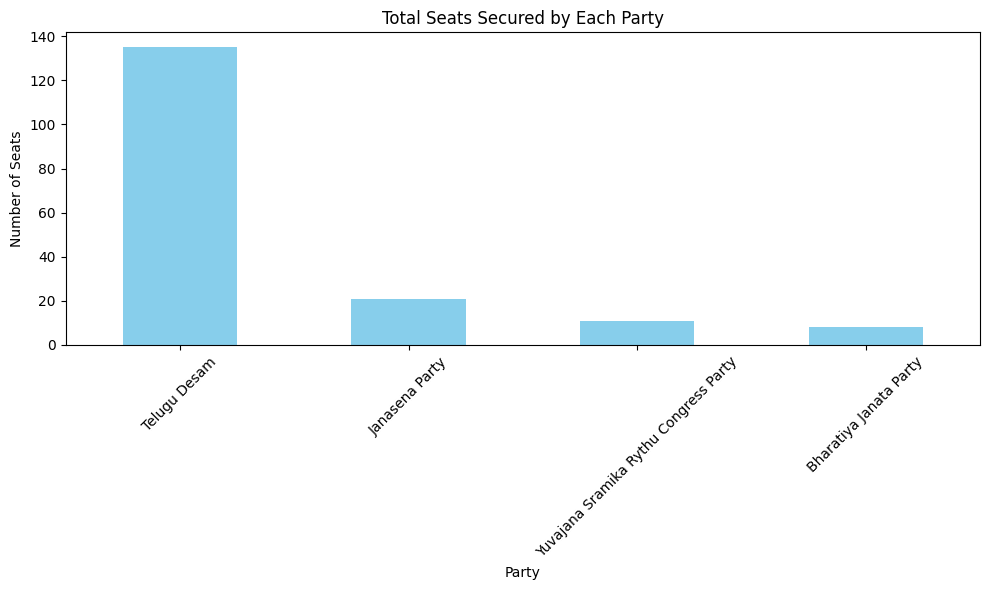

In [21]:
# Calculate total seats won by each party
total_seats_by_party = data['Leading Party'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
total_seats_by_party.plot(kind='bar', color='skyblue')
plt.title('Total Seats Secured by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

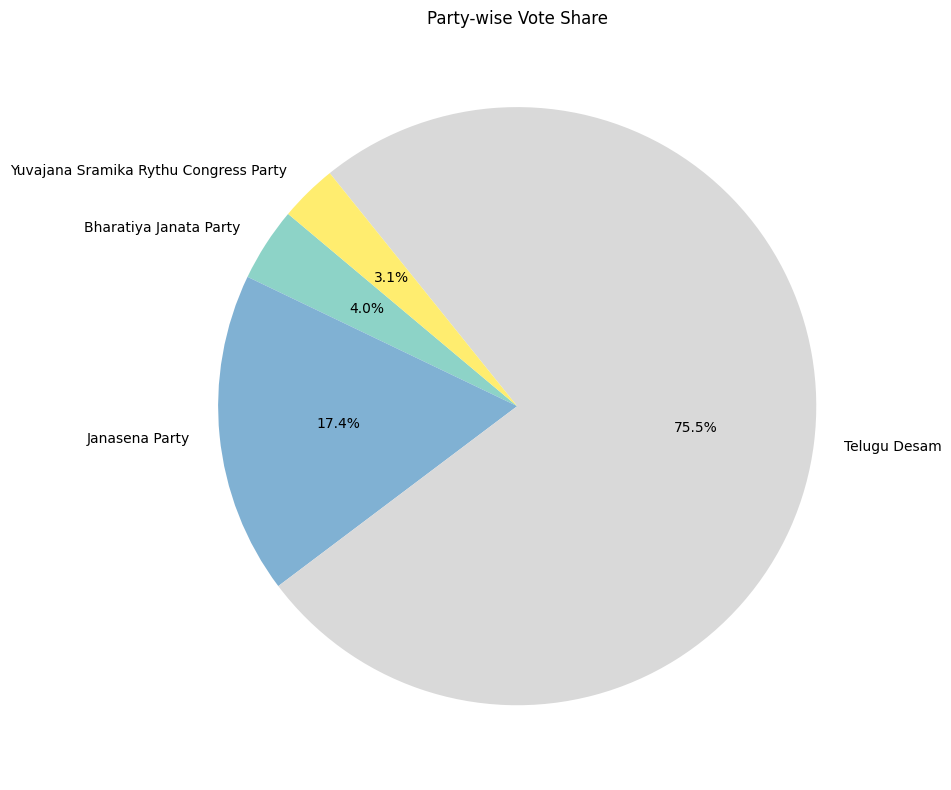

In [22]:
vote_share = data.groupby('Leading Party')['Margin'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
vote_share.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Party-wise Vote Share')
plt.ylabel('')
plt.tight_layout()
plt.show()